# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Python-implementation-of-the-Exponential-Integral-function" data-toc-modified-id="Python-implementation-of-the-Exponential-Integral-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python implementation of <a href="https://en.wikipedia.org/wiki/Exponential_integral" target="_blank">the Exponential Integral</a> function</a></div><div class="lev2 toc-item"><a href="#Two-implementations" data-toc-modified-id="Two-implementations-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Two implementations</a></div><div class="lev2 toc-item"><a href="#Checking-the-two-versions" data-toc-modified-id="Checking-the-two-versions-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking the two versions</a></div><div class="lev2 toc-item"><a href="#Comparison-with-scipy.special.expi" data-toc-modified-id="Comparison-with-scipy.special.expi-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Comparison with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expi.html#scipy.special.expi" target="_blank"><code>scipy.special.expi</code></a></a></div><div class="lev2 toc-item"><a href="#Special-values" data-toc-modified-id="Special-values-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Special values</a></div><div class="lev2 toc-item"><a href="#Limits" data-toc-modified-id="Limits-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Limits</a></div><div class="lev2 toc-item"><a href="#Plots" data-toc-modified-id="Plots-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plots</a></div><div class="lev3 toc-item"><a href="#Checking-some-inequalities" data-toc-modified-id="Checking-some-inequalities-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Checking some inequalities</a></div><div class="lev2 toc-item"><a href="#Other-plots" data-toc-modified-id="Other-plots-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Other plots</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></div>

# Python implementation of [the Exponential Integral](https://en.wikipedia.org/wiki/Exponential_integral) function

This small notebook is a [Python 3](https://www.python.org/) implementation of the Exponential Integral function, $Ei(x)$, defined like this:

$$ \forall x\in\mathbb{R}\setminus\{0\},\;\; \mathrm{Ei}(x) := \int_{-\infty}^x \frac{\mathrm{e}^u}{u} \; \mathrm{d}u. $$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)

In [27]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (19.80, 10.80)

## Two implementations
As one can show mathematically, there is another equivalent definition (the one used on Wikipedia):

$$ \forall x\in\mathbb{R}\setminus\{0\},\;\; \mathrm{Ei}(x) := - \int_{-x}^{\infty} \frac{\mathrm{e}^{-t}}{t} \; \mathrm{d}t. $$

Numerically, we will avoid the issue in $0$ by integrating up-to $-\varepsilon$ instead of $0^-$ and from $\varepsilon$ instead of $0^+$, for a some small $\varepsilon$ (*e.g.*, $\varepsilon=10^{-7}$), and from $-M$ for a large value $M\in\mathbb{R}$ (*e.g.*, $M=10000$), instead of $-\infty$.

We use the [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function.

In [28]:
from scipy.integrate import quad  # need only 1 function

First definition is the simplest:

In [29]:
@np.vectorize
def Ei(x, minfloat=1e-7, maxfloat=10000):
    """Ei integral function."""
    minfloat = min(np.abs(x), minfloat)
    maxfloat = max(np.abs(x), maxfloat)
    def f(t):
        return np.exp(t) / t
    if x > 0:
        return (quad(f, -maxfloat, -minfloat)[0] + quad(f, minfloat, x)[0])
    else:
        return quad(f, -maxfloat, x)[0]

The other definition is very similar:

In [30]:
@np.vectorize
def Ei_2(x, minfloat=1e-7, maxfloat=10000):
    """Ei integral function."""
    minfloat = min(np.abs(x), minfloat)
    maxfloat = max(np.abs(x), maxfloat)
    def f(t):
        return np.exp(-t) / t
    if x > 0:
        return -1.0 * (quad(f, -x, -minfloat)[0] + quad(f, minfloat, maxfloat)[0])
    else:
        return -1.0 * quad(f, -x, maxfloat)[0]

## Checking the two versions
We can quickly check that the two are equal:

In [31]:
from numpy.linalg import norm

In [32]:
X = np.linspace(-1, 1, 1000)  # 1000 points
Y = Ei(X)
Y_2 = Ei_2(X)

In [33]:
assert np.allclose(Y, Y_2)
print(f"Two versions of Ei(x) are indeed equal for {len(X)} values.")

Two versions of Ei(x) are indeed equal for 1000 values.


We can compare which is fastest to evaluate:

In [34]:
%timeit Y = Ei(X)
%timeit Y_2 = Ei_2(X)

1.72 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.62 s ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


They both take about the same time, but the second implementation seems (slightly) faster.

## Comparison with [`scipy.special.expi`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expi.html#scipy.special.expi)

The $\mathrm{Ei}$ function is also implemented as [`scipy.special.expi`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expi.html#scipy.special.expi):

In [35]:
from scipy.special import expi

In [36]:
Y_3 = expi(X)

In [37]:
np.allclose(Y, Y_3)

False

The difference is not too large:

In [38]:
np.max(np.abs(Y - Y_3))

2.0000000611197777e-07

In [39]:
assert np.allclose(Y, Y_3, rtol=1e-6, atol=1e-6)
print(f"Our version of Ei(x) is the same as the one in scipy.special.expi ({len(X)} values).")

Our version of Ei(x) is the same as the one in scipy.special.expi (1000 values).


## Special values
We can compute some special values, like $\mathrm{Ei}(1)$ and solving (numerically) $\mathrm{Ei}(x)=0$.

In [40]:
Ei(1)

array(1.89511762)

In [41]:
from scipy.optimize import root

In [42]:
res = root(Ei, x0=1)
res

    fjac: array([[-1.]])
     fun: array([-3.55271368e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.78710388e-12])
       r: array([-3.89621516])
  status: 1
 success: True
       x: array([0.37250746])

In [43]:
print(f"The approximate solution to Ei(x)=0 is x0 = {res.x[0]} (for which Ei(x)={res.fun})...")

The approximate solution to Ei(x)=0 is x0 = 0.37250746211322744 (for which Ei(x)=[-3.55271368e-15])...


## Limits

We can check that $\mathrm{Ei}(x)\to0$ for $x\to-\infty$ and $\mathrm{Ei}(x)\to+\infty$ for $x\to\infty$:

In [44]:
for x in -np.linspace(1, 1000, 10):
    print(f"For x = {x:>6.3g}, Ei(x) = {Ei(x):>10.3g} : it goes to 0 quite fast!")

For x =     -1, Ei(x) =     -0.219 : it goes to 0 quite fast!
For x =   -112, Ei(x) =  -1.17e-54 : it goes to 0 quite fast!
For x =   -223, Ei(x) = -4.27e-103 : it goes to 0 quite fast!
For x =   -334, Ei(x) =    -2e-151 : it goes to 0 quite fast!
For x =   -445, Ei(x) = -1.05e-199 : it goes to 0 quite fast!
For x =   -556, Ei(x) = -5.85e-248 : it goes to 0 quite fast!
For x =   -667, Ei(x) = -3.39e-296 : it goes to 0 quite fast!
For x =   -778, Ei(x) =         -0 : it goes to 0 quite fast!
For x =   -889, Ei(x) =         -0 : it goes to 0 quite fast!
For x = -1e+03, Ei(x) =         -0 : it goes to 0 quite fast!


In [45]:
for x in np.linspace(1, 800, 9):
    print(f"For x = {x:>6.3g}, Ei(x) = {Ei(x):>10.3g} : it goes to +oo quite fast!")

For x =      1, Ei(x) =        1.9 : it goes to +oo quite fast!
For x =    101, Ei(x) =   6.46e+41 : it goes to +oo quite fast!
For x =    201, Ei(x) =   7.66e+84 : it goes to +oo quite fast!
For x =    301, Ei(x) =  1.21e+128 : it goes to +oo quite fast!
For x =    400, Ei(x) =  2.15e+171 : it goes to +oo quite fast!
For x =    500, Ei(x) =  4.09e+214 : it goes to +oo quite fast!
For x =    600, Ei(x) =  8.08e+257 : it goes to +oo quite fast!
For x =    700, Ei(x) =  1.64e+301 : it goes to +oo quite fast!
For x =    800, Ei(x) =        inf : it goes to +oo quite fast!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


We can check that $\mathrm{Ei}(x)\to-\infty$ for $x\to0^-$ and $x\to0^+$:

In [46]:
for x in -1/np.logspace(1, 20, 10):
    print(f"For x = {x:>10.3g} --> 0^-, Ei(x) = {Ei(x):>5.3g} : it doesn't go to -oo numerically!")

For x =       -0.1 --> 0^-, Ei(x) = -1.82 : it doesn't go to -oo numerically!
For x =  -0.000774 --> 0^-, Ei(x) = -6.59 : it doesn't go to -oo numerically!
For x =  -5.99e-06 --> 0^-, Ei(x) = -11.4 : it doesn't go to -oo numerically!
For x =  -4.64e-08 --> 0^-, Ei(x) = -16.3 : it doesn't go to -oo numerically!
For x =  -3.59e-10 --> 0^-, Ei(x) = -21.2 : it doesn't go to -oo numerically!
For x =  -2.78e-12 --> 0^-, Ei(x) =   -26 : it doesn't go to -oo numerically!
For x =  -2.15e-14 --> 0^-, Ei(x) = -30.8 : it doesn't go to -oo numerically!
For x =  -1.67e-16 --> 0^-, Ei(x) = -31.9 : it doesn't go to -oo numerically!
For x =  -1.29e-18 --> 0^-, Ei(x) = -31.9 : it doesn't go to -oo numerically!
For x =     -1e-20 --> 0^-, Ei(x) = -31.9 : it doesn't go to -oo numerically!


/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [47]:
for x in 1/np.logspace(1, 20, 10):
    print(f"For x = {x:>8.3g} --> 0^+, Ei(x) = {Ei(x):>5.3g} : it doesn't go to -oo numerically!")

For x =      0.1 --> 0^+, Ei(x) = -1.62 : it doesn't go to -oo numerically!
For x = 0.000774 --> 0^+, Ei(x) = -6.59 : it doesn't go to -oo numerically!
For x = 5.99e-06 --> 0^+, Ei(x) = -11.4 : it doesn't go to -oo numerically!
For x = 4.64e-08 --> 0^+, Ei(x) = -16.3 : it doesn't go to -oo numerically!
For x = 3.59e-10 --> 0^+, Ei(x) = -21.2 : it doesn't go to -oo numerically!
For x = 2.78e-12 --> 0^+, Ei(x) =   -26 : it doesn't go to -oo numerically!
For x = 2.15e-14 --> 0^+, Ei(x) = -30.8 : it doesn't go to -oo numerically!
For x = 1.67e-16 --> 0^+, Ei(x) = -31.9 : it doesn't go to -oo numerically!
For x = 1.29e-18 --> 0^+, Ei(x) = -31.9 : it doesn't go to -oo numerically!
For x =    1e-20 --> 0^+, Ei(x) = -31.9 : it doesn't go to -oo numerically!


/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


## Plots
And we can plot the $Ei(x)$ function, from $-1$ to $1$.

Text(0.5,1,'The function $Ei(x)$ on $[-1,1]$')

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

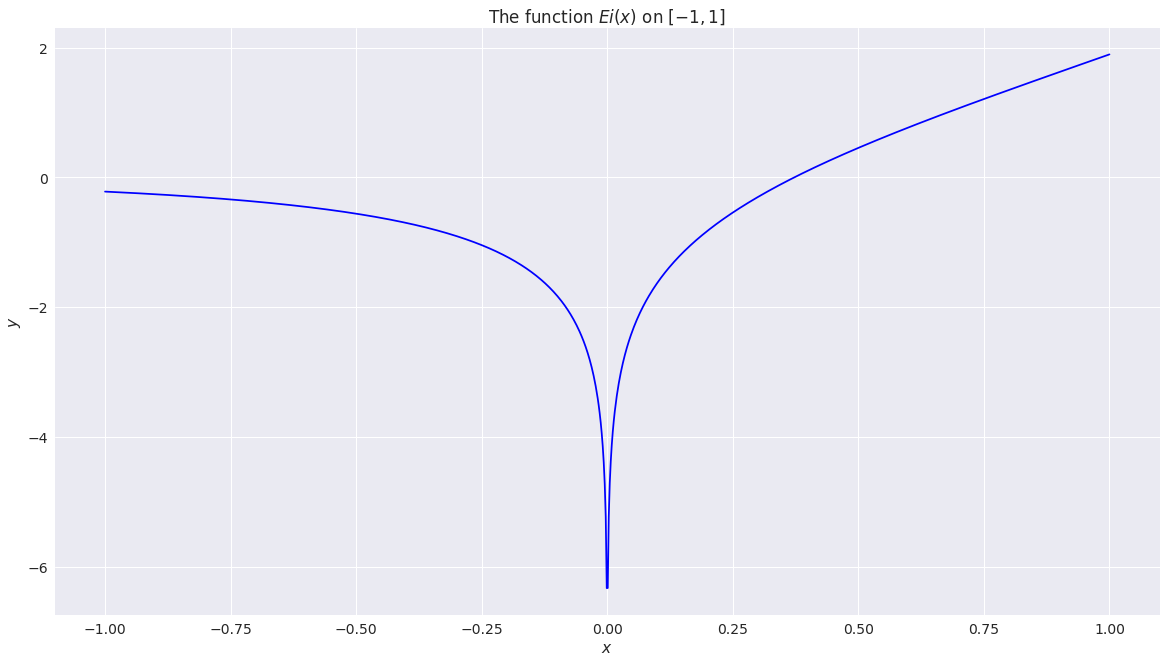

In [48]:
plt.plot(X, Y, 'b')
plt.title("The function $Ei(x)$ on $[-1,1]$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

### Checking some inequalities

Let's check that $\forall x\in\mathbb{R}, \mathrm{Ei}(x) \leq \mathrm{e}^x$:

In [49]:
np.alltrue(Y <= np.exp(X))

True

We can check a tighter inequality, $\forall x\in\mathbb{R}, \mathrm{Ei}(x) \leq \mathrm{Ei}(-1) + (\mathrm{e}^x - \mathrm{e}) + (\mathrm{e} - \frac{1}{\mathrm{e}})$.

It is indeed tighter, as the constant on the right-hand side is non-negative:

In [59]:
Ei(-1) + (-np.exp(1)) + (np.exp(1) - np.exp(-1))

-0.5872633755669625

In [60]:
upper_bound = np.exp(X) + (Ei(-1) + (-np.exp(1)) + (np.exp(1) - np.exp(-1)))
np.alltrue(Y <= upper_bound)

True

Text(0.5,1,'The function $Ei(x)$ and upper-bound $e^x$ and $e^x + Ei(-1) - 1/e$')

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

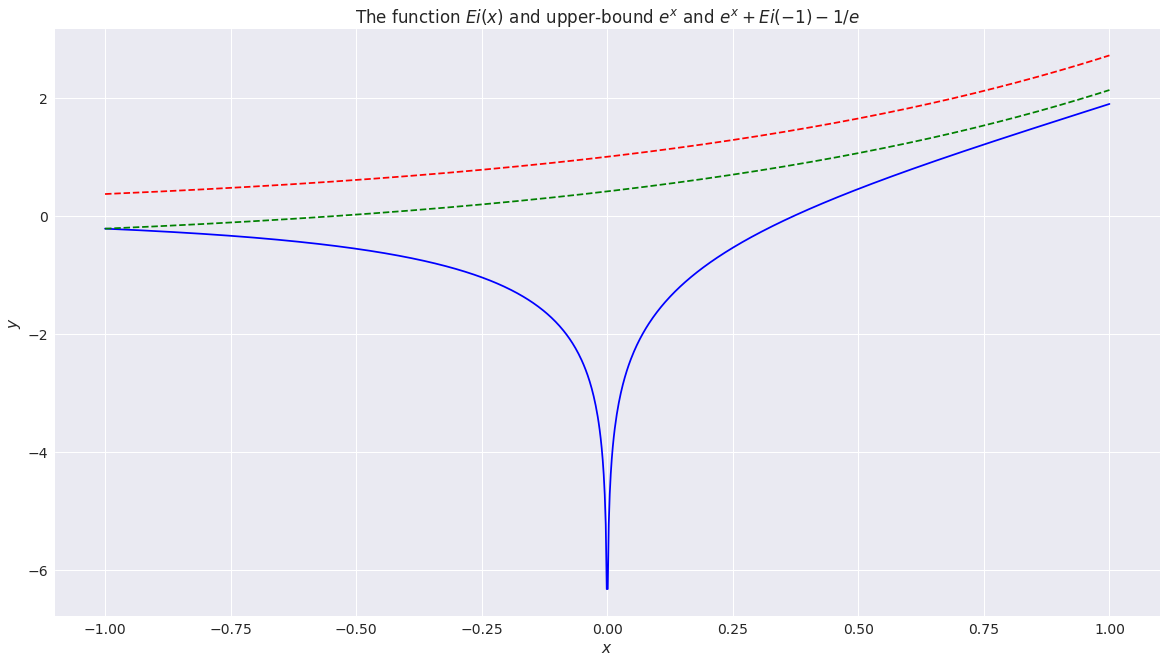

In [61]:
plt.plot(X, Y, 'b')
plt.plot(X, np.exp(X), 'r--')
plt.plot(X, np.exp(X) + (Ei(-1) + (-np.exp(1)) + (np.exp(1) - np.exp(-1))), 'g--')
plt.title("The function $Ei(x)$ and upper-bound $e^x$ and $e^x + Ei(-1) - 1/e$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

We can check a tighter inequality, $\forall t\geq1, \forall x\geq1, \mathrm{Ei}(x) \leq \mathrm{Ei}(t) + \frac{\mathrm{e}^x - \mathrm{e}^{t}}{t}$.

In [76]:
e = np.exp(1)
upper_bound_cst = lambda t: Ei(t) - np.exp(t)/t
upper_bound_t = lambda t, X: Ei(t) + (np.exp(X) - np.exp(t))/t

upper_bound_cst(1)
upper_bound_cst(e)
upper_bound_cst(2*e)

-0.8231642121030913

2.6367399306227393

13.473133012157838

In [91]:
X_4 = np.linspace(1, 2*e, 1000)
Y_4 = Ei(X_4)

def check_upper_bound(t):
    upper_bound_4 = upper_bound_t(t, X_4)
    return np.alltrue(Y_4 <= upper_bound_4)

check_upper_bound(1)
check_upper_bound(e)
check_upper_bound(2*e)

True

True

True

In [107]:
def see_upper_bound(t, xmax, onlylast=False):
    X_4 = np.linspace(1, xmax, 1000)
    Y_4 = Ei(X_4)
    
    plt.plot(X_4, Y_4, 'b', label='Ei(x)')
    upper_bound_4 = upper_bound_t(t, X_4)
    plt.plot(X_4, upper_bound_4, 'y--', label='$Ei(t) + (e^x - e^t)/t$ for t = %.3g' % t)
    if not onlylast:
        plt.plot(X_4, np.exp(X_4), 'r--', label='$e^x$')
        plt.plot(X_4, np.exp(X_4) + (Ei(-1) + (-np.exp(1)) + (np.exp(1) - np.exp(-1))), 'g--', label='$e^x + Ei(-1) - 1/e$')
        plt.title("The function $Ei(x)$ and upper-bounds $e^x$ and $e^x + Ei(-1) - 1/e$ and $Ei(t) + (e^x - e^t)/t$ for t = %.3g" % t)
    else:
        plt.title("The function $Ei(x)$ and upper-bound $Ei(t) + (e^x - e^t)/t$ for t = %.3g" % t)
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()

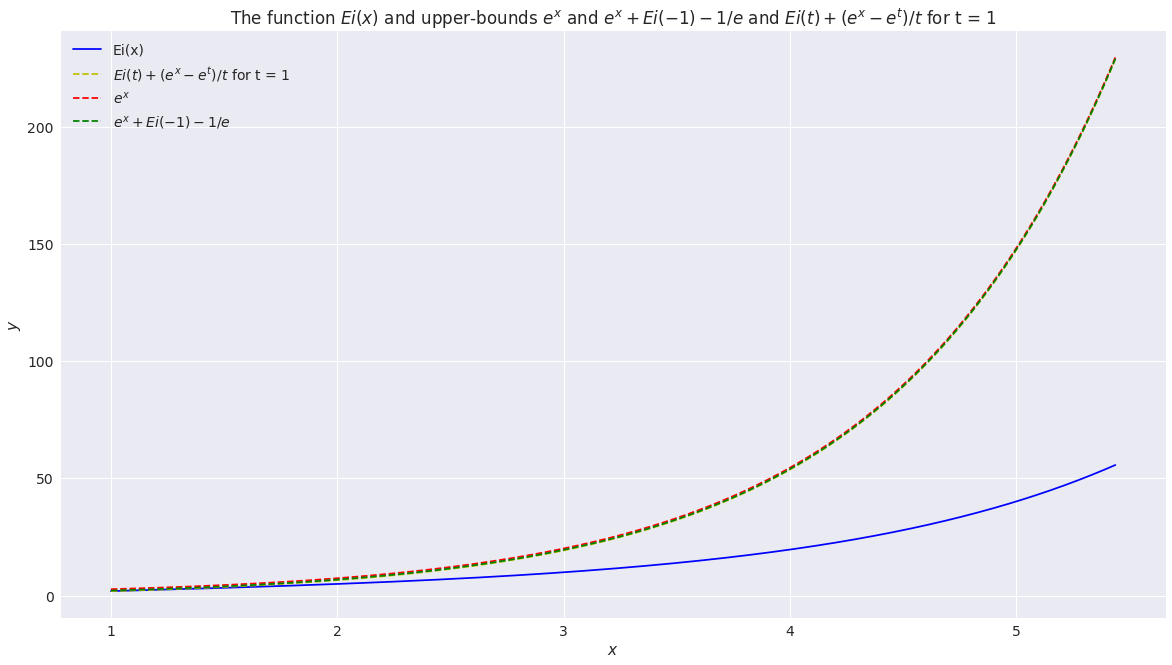

In [108]:
t = 1
see_upper_bound(t, 2*e)

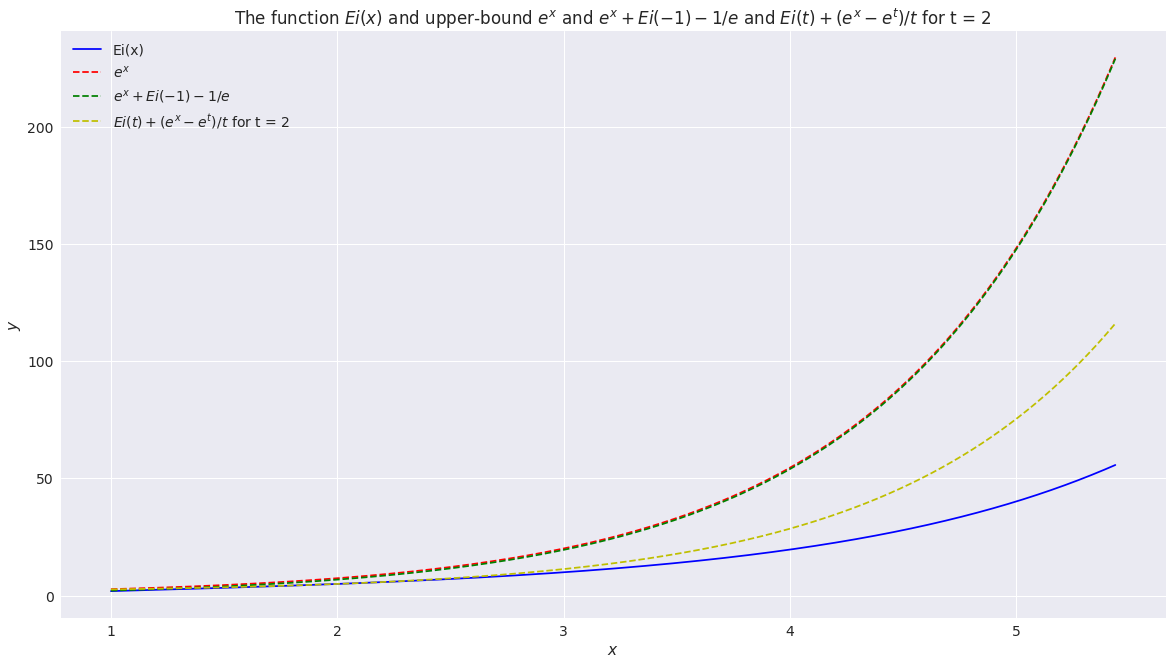

In [101]:
t = 2
see_upper_bound(t, 2*e)

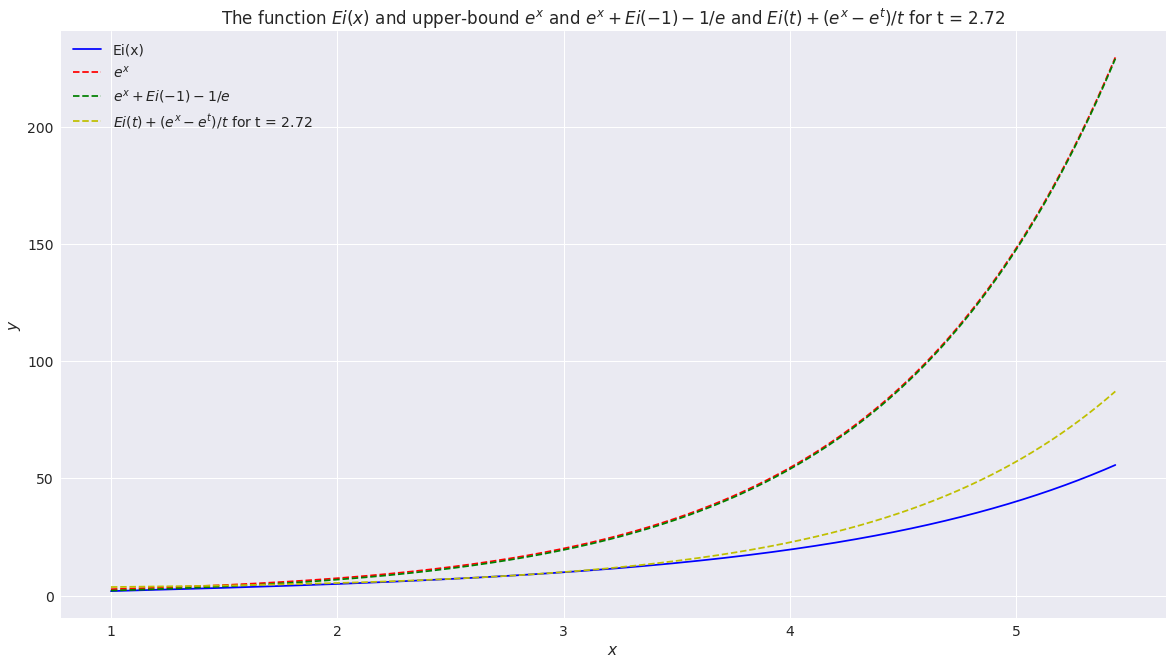

In [95]:
t = e
see_upper_bound(t, 2*e)

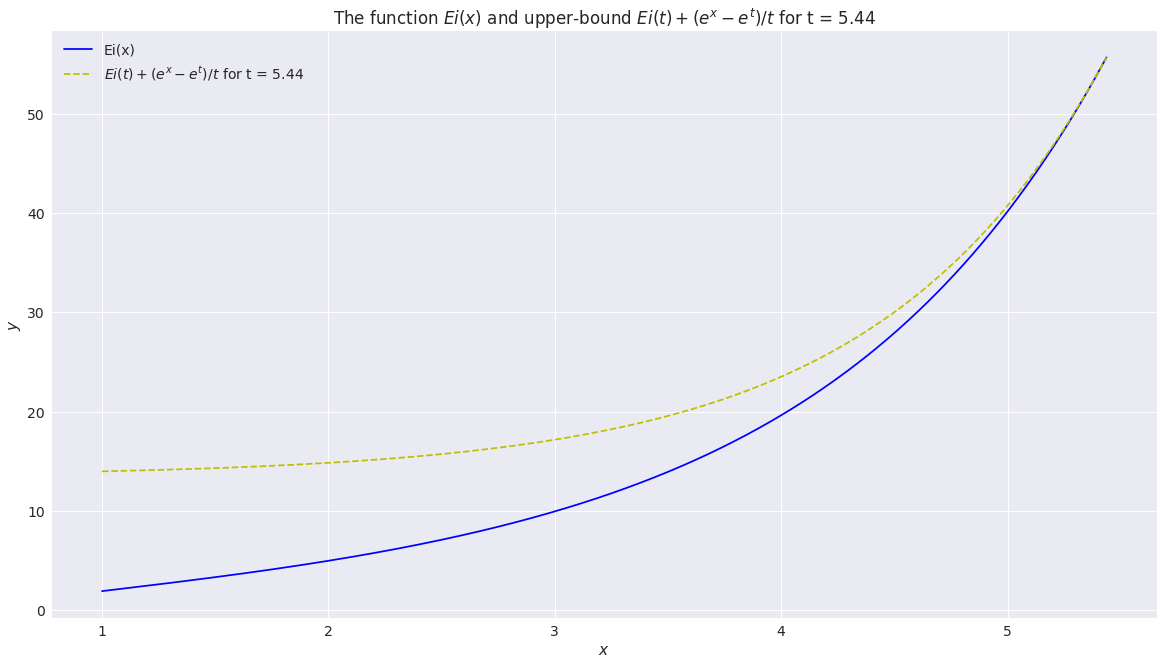

In [109]:
t = 2*e
see_upper_bound(t, t, onlylast=True)

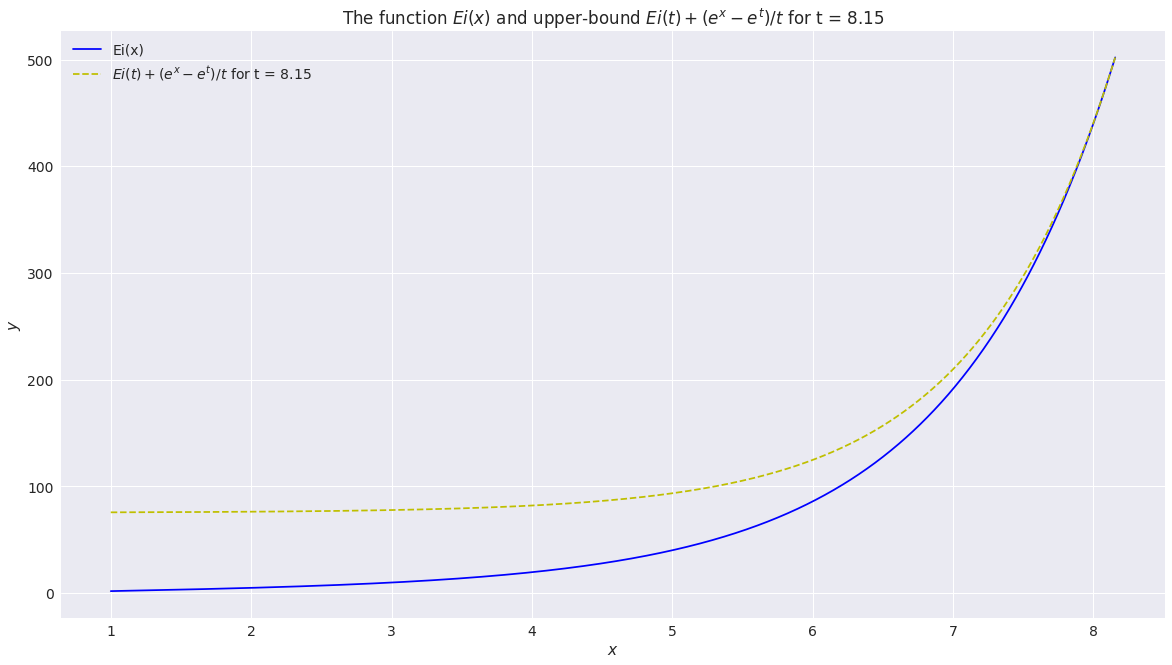

In [110]:
t = 3*e
see_upper_bound(t, t, onlylast=True)

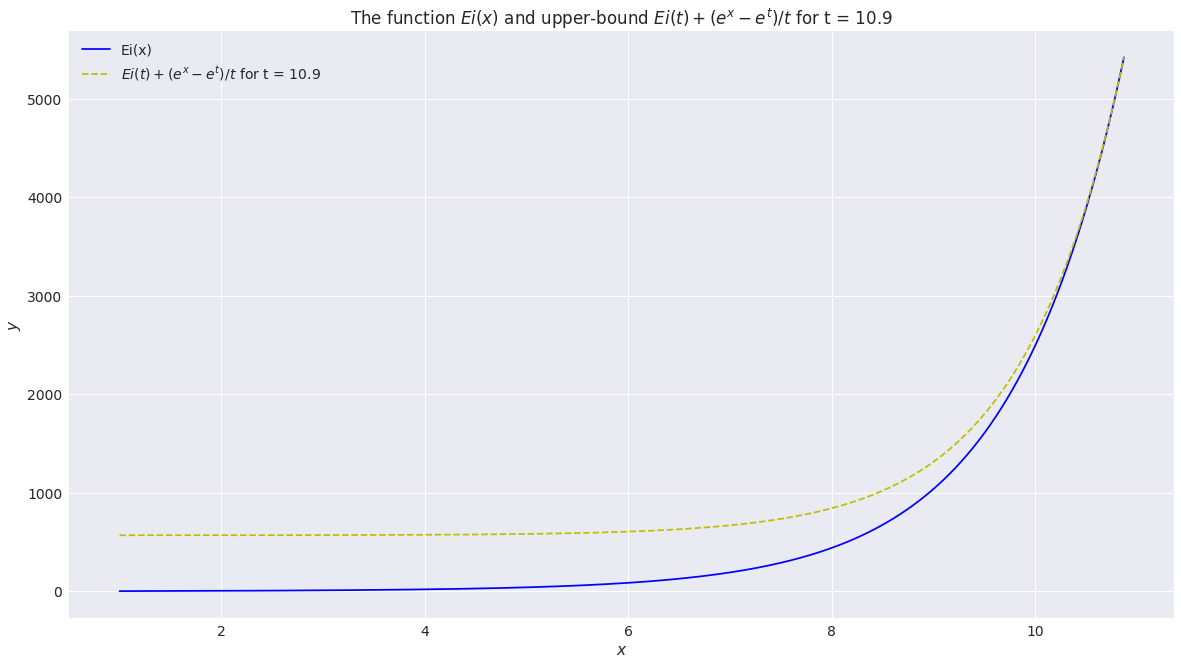

In [111]:
t = 4*e
see_upper_bound(t, t, onlylast=True)

In [113]:
I = lambda t: Ei(t) - Ei(-t)
I(1)
e - 1/e
assert I(1) < e - 1/e
I(e)

2.114501550751474

2.3504023872876028

8.230413924956927

## Other plots

Text(0.5,1,'The function $Ei(x)$ on $[0, e^2]$')

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

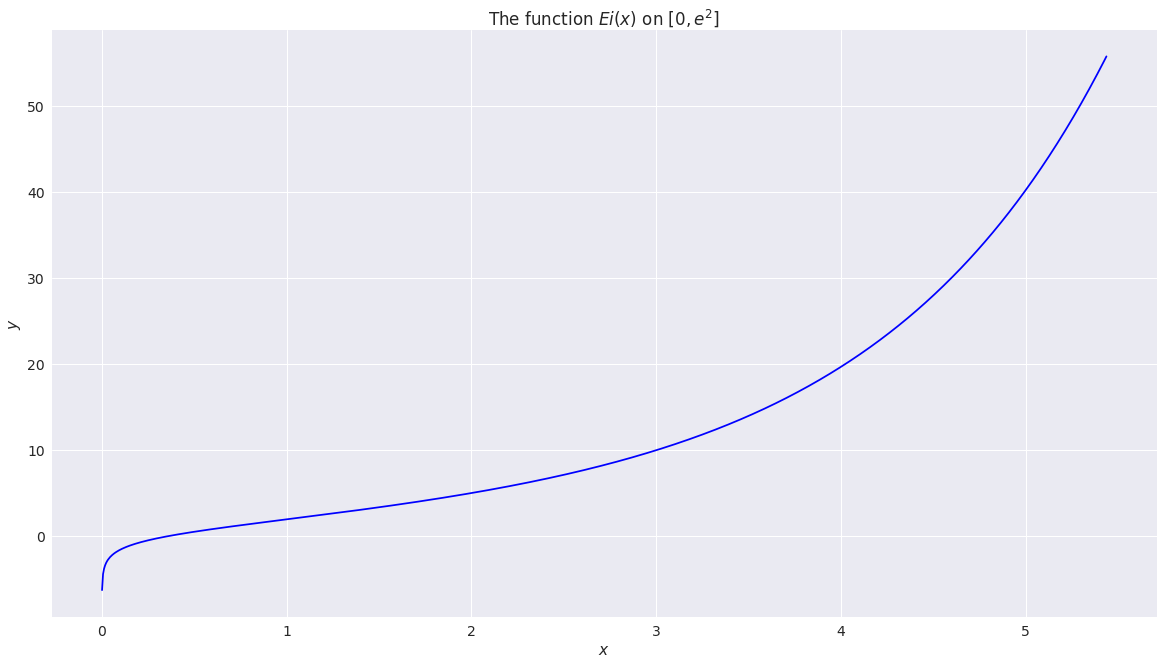

In [98]:
X = np.linspace(1e-3, 2*e, 1000)  # 1000 points
Y = Ei(X)
plt.plot(X, Y, 'b')
plt.title("The function $Ei(x)$ on $[0, e^2]$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Conclusion

That's it, see [this page](https://en.wikipedia.org/wiki/Exponential_integral) or [this one](http://mathworld.wolfram.com/ExponentialIntegral.html) for more details on this function $\mathrm{Ei}(x)$.